In [1]:
import numpy as np
import sys
sys.path.append("../../src/")
import utility
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from scipy.stats import kruskal
from statsmodels.stats.proportion import proportions_chisquare

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import statsmodels.api as sm

from scipy import stats

import pandas as pd

import math


In [2]:
df_IEA_P1 = pd.read_csv("../../output/IEA_P1.csv").set_index("sid")
df_data = utility.load_longitudinal()
df_PCs = utility.load_SSL_PCs()

df_merged = pd.merge(df_data, df_IEA_P1, left_index = True, right_index = True)
df_merged = pd.merge(df_merged, df_PCs, left_index = True, right_index = True)




/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [3]:
columns_used = ["IEA0", "IEA1", "PCA_emphysema_axis", "PCA_airway_axis", "PC0_P1", "PC1_P1"]
df_used = df_merged[ columns_used ]
df_used.loc[:, "PC0_P1"] = - df_used["PC0_P1"]

/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [4]:
pearson_r = np.round(df_used.corr().to_numpy(), 2)
cov_names = ["IEA$_{emph}$", "IEA$_{airway}$", "FA$_{emph}$", "FA$_{airway}$", "PCA-I1", "PCA-I2"]

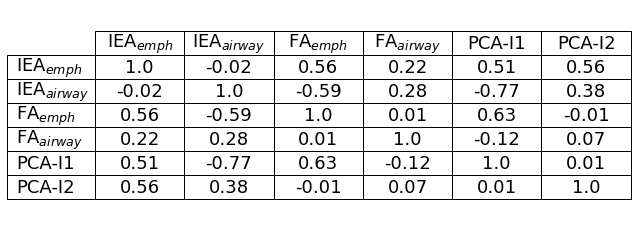

In [5]:
plt.figure(figsize=(8,4))
the_table=plt.table(cellText=pearson_r, rowLabels=cov_names, colLabels = cov_names,
                    colWidths = [.1]*pearson_r.shape[1], loc='center',cellLoc = "center")
plt.axis('off')
the_table.auto_set_font_size(False)
the_table.set_fontsize(18)
the_table.scale(2, 2)